## Dataset Overview
Columns

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [326]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split   # Split dataset into train/test
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score  , root_mean_squared_error # Evaluate regression performance
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer , PowerTransformer
from sklearn.model_selection import cross_val_score , GridSearchCV
import joblib

In [250]:
df = pd.read_csv(f"/content/drive/MyDrive/Medical_insurance_prediction/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [251]:
#dataset info
df.shape

(1338, 7)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [253]:
#statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Missing values:


In [254]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#### Duplicated values

In [255]:
df.duplicated().sum()

np.int64(1)

In [256]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [257]:
df = df.drop_duplicates()

In [258]:
df.duplicated().sum()

np.int64(0)

In [259]:
df.shape

(1337, 7)

duplicated row deleted


# EDA:


#### Univariate Analysis

In [260]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [261]:
cat_cols = df.select_dtypes(include='object').columns

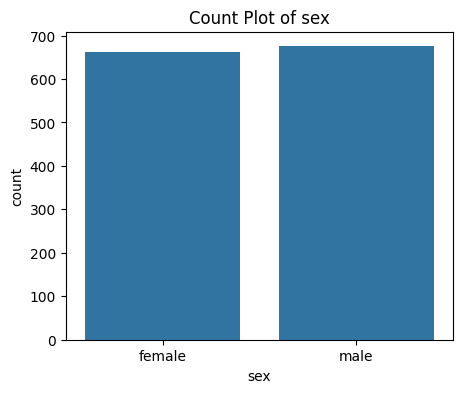

-------------------------------------


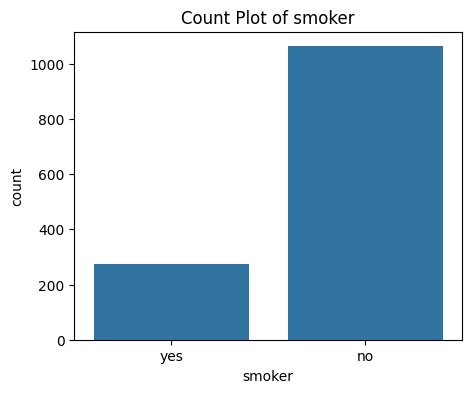

-------------------------------------


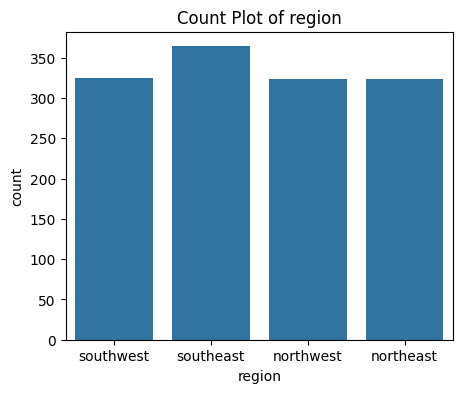

-------------------------------------


In [262]:
for col in cat_cols:
    plt.figure(figsize=(5,4))         # create a new figure for each plot
    sns.countplot(x=df[col], data=df) # plot counts for that column
    plt.xlabel(col)
    plt.title(f"Count Plot of {col}")
    plt.show()
    print("-------------------------------------")

- most people are from southeast other regions have same quantity almost
- most people are non smoker
- male and female ratio are almost same

In [263]:
num_cols = df.select_dtypes(include=["float" , "int"]).columns

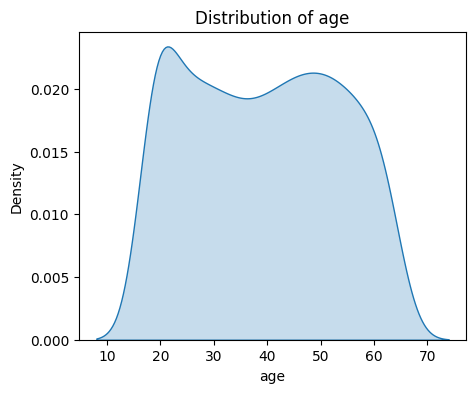

---------------------------


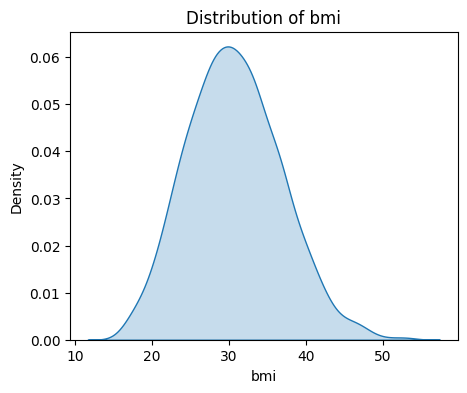

---------------------------


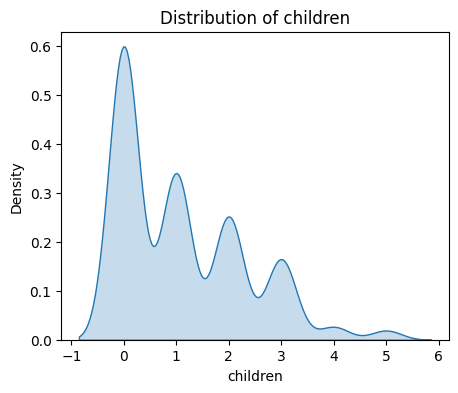

---------------------------


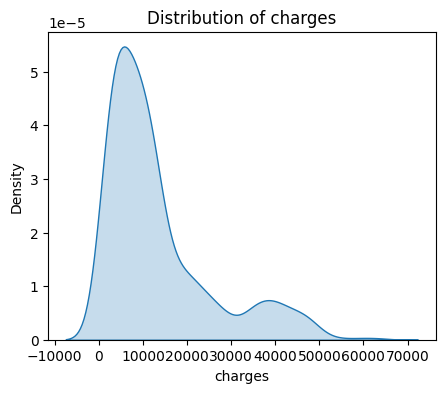

---------------------------


In [264]:
for col in num_cols:
  plt.figure(figsize=(5,4))
  plt.title(f"Distribution of {col}")
  sns.kdeplot(x=col , data=df , fill=True)
  plt.show()
  print("---------------------------")

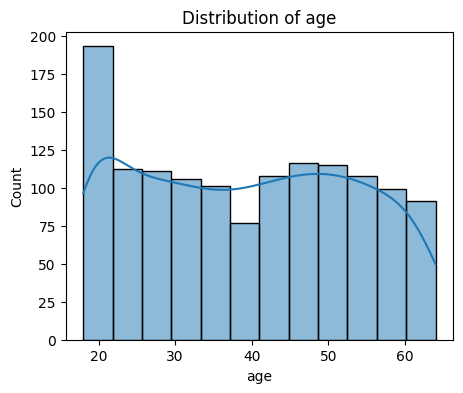

---------------------------


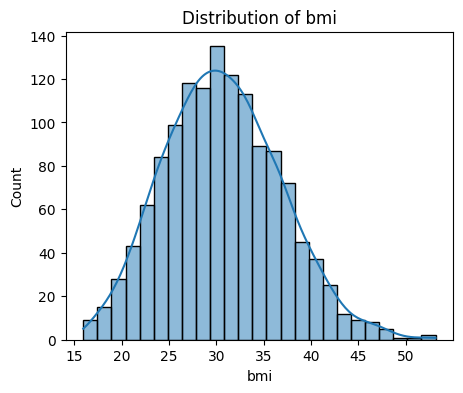

---------------------------


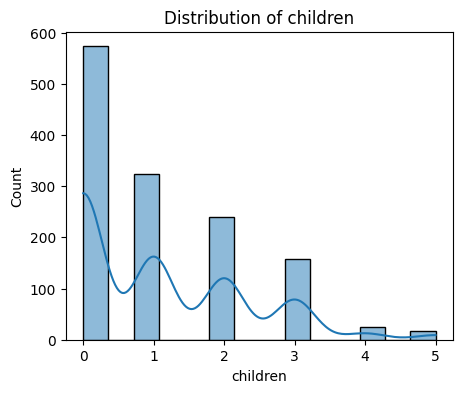

---------------------------


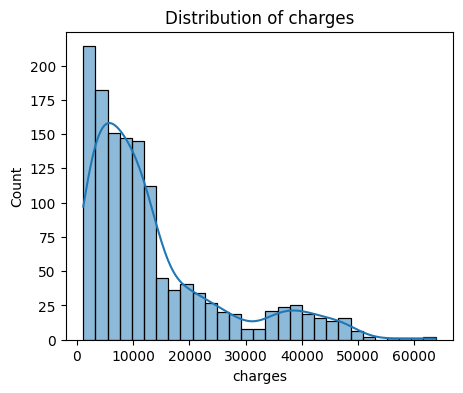

---------------------------


In [265]:
for col in num_cols:
  plt.figure(figsize=(5,4))
  plt.title(f"Distribution of {col}")
  sns.histplot(x=col , data=df , kde=True )
  plt.show()
  print("---------------------------")

people with 0 children are more

## Bivariate Anaylsis

In [266]:

fig = px.histogram(df, x="charges" , color="sex")
fig.show()

In [267]:
fig = px.histogram(df, x="charges" , color="region")
fig.show()

In [268]:
fig = px.histogram(df, x="children" , color="sex" ,y="charges" , histfunc="avg")
fig.show()

In [269]:
fig = px.histogram(df, x="sex" , color="smoker" ,y="charges" ,histfunc="avg")
fig.show()

In [270]:
fig = px.histogram(df, x="sex" , color="smoker" ,y="bmi" ,histfunc="avg")
fig.show()

In [271]:
fig = px.histogram(df, x="region" , color="sex" , y="charges" , histfunc="avg")
fig.show()

In [272]:
fig = px.histogram(df, x="bmi" , color="sex" , y="charges" , histfunc="avg" , pattern_shape="children")
fig.show()

### Outputs of bivariate anaylsis
- most charges are around 0 to 20k
- females with 2-4 children have more spending
- males with 2-3 children have more spending
- overall male with children have more spending than females
- females and males both charges are around 0 to 20k mostly
- all regions mostly have same spending thresholds
- female and male with 0 children are more
- male have more spending then female
- female non smokers have more spending than male non smoker
- male smokers have more spending than female smoker
- male smoker have more spending than female non smoker
- overall male smokerrs have more spending
- males from southeast have more charges
- females region wise spending ratio are mostly same south east slighly higher
- overall male from southeast have more charges than females
- male smoker have some high bmi
- non smokers sex have almost same bmi
- females with bmi above 45 have high charges
- males above 50 have high charges
- but overall females with above 45 bmi have high charges than males bmi 50
- female with 0 children having bmi above 45 have more charges than other
- male with 3 children have overall high charges and their bmi falls in between 35-40

## Feature Engineering

In [273]:
# converting into 2 catgroies having children yes 1 or no 0
df['has_children'] = df['children'].apply(lambda x: 1 if x > 0 else 0)


In [274]:
df.head()

,age,sex,bmi,children,smoker,region,charges,has_children
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


#### Correlation matrix

<Axes: >

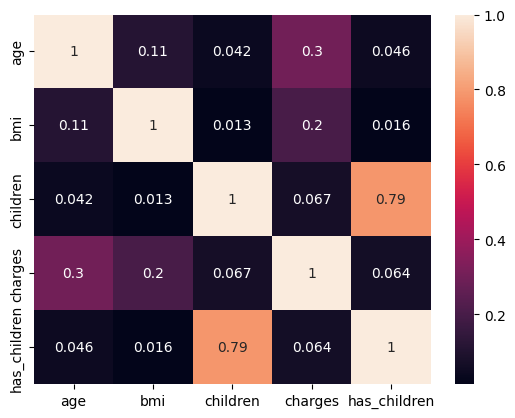

In [275]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr , annot=True)

bmi and age have positive correlation with charges(target variable)

children number is not impacting charges as much so we will keep only has children columns that simply tells a person with child or not

In [276]:
df.drop(columns=["children"], axis=1, inplace=True)


In [277]:
df.head()

,age,sex,bmi,smoker,region,charges,has_children
0,19,female,27.900,yes,southwest,16884.92400,0
1,18,male,33.770,no,southeast,1725.55230,1
2,28,male,33.000,no,southeast,4449.46200,1
3,33,male,22.705,no,northwest,21984.47061,0
4,32,male,28.880,no,northwest,3866.85520,0



####  Skewness

In [278]:
cols = ["age", "bmi", "charges"]
for col in cols:
  print(f"{col} = {df[col].skew()}")


age = 0.054780773126998195
bmi = 0.28391419385321137
charges = 1.5153909108403483


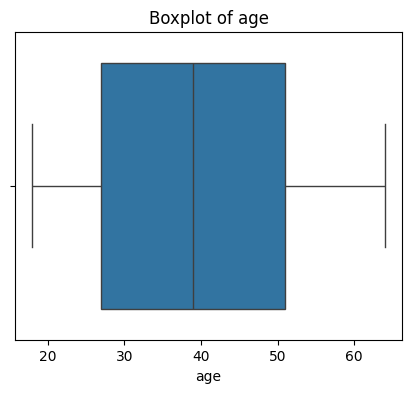

--------------------------


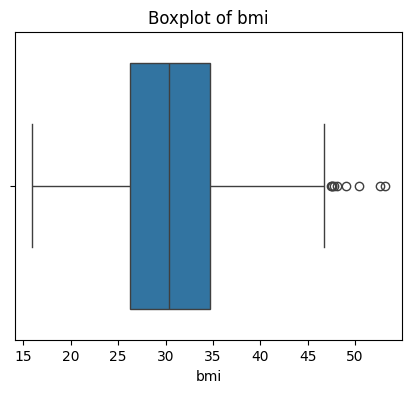

--------------------------


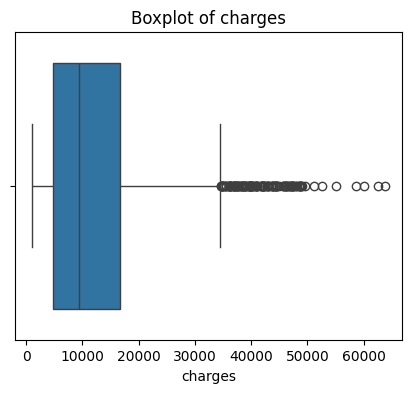

--------------------------


In [279]:
# outlier checking part
for col in cols:
  plt.figure(figsize=(5,4))
  plt.title(f"Boxplot of {col}")
  sns.boxplot(x=df[col] , data=df)
  plt.show()
  print("--------------------------")

- charges are highly skewed we will tranform it

# Model training and evaluation part

### preprocesiing

In [280]:
df_new = df.copy()

In [281]:
df_new.head()

,age,sex,bmi,smoker,region,charges,has_children
0,19,female,27.900,yes,southwest,16884.92400,0
1,18,male,33.770,no,southeast,1725.55230,1
2,28,male,33.000,no,southeast,4449.46200,1
3,33,male,22.705,no,northwest,21984.47061,0
4,32,male,28.880,no,northwest,3866.85520,0


- age to be scaled
- bmi scaled
- charges to be power transformed
- sex smoker and region one hot encode
- bmi category to be label encode

In [282]:
X=df_new.drop(columns=["charges"] , axis=1)
y=df_new["charges"]

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [284]:
#transforming target variable
log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1)
y_train_trans= log_transformer.fit_transform(y_train)
y_test_trans = log_transformer.transform(y_test)

In [285]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'charges', 'has_children'], dtype='object')

In [286]:
# preprocessing for linear models
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),["age","bmi"]),
        ("cat",OneHotEncoder(drop="first" ,sparse_output=False),["sex","smoker","region"])
    ],
     remainder='passthrough'
)


## Linear Regression:

In [287]:
lr_pipe = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",LinearRegression())

]
)

In [288]:
cross_val = cross_val_score(lr_pipe , X_train , y_train_trans, scoring="r2")
print("Cross_val_mean" , cross_val.mean())


Cross_val_mean 0.7433791584911152


- when trained on transformed target

In [289]:
lr_pipe.fit(X_train ,y_train_trans)
y_pred = lr_pipe.predict(X_test)
y_pred_original = log_transformer.inverse_transform(y_pred)
print("R2 score = ",r2_score(y_test, y_pred_original))
print("MSE score = ",mean_squared_error(y_test, y_pred_original))
print("RMSE score = ",root_mean_squared_error(y_test, y_pred_original))


R2 score =  0.7008228957805769
MSE score =  54975607.12257496
RMSE score =  7414.553737250473


when trained on original target

In [290]:
lr_pipe.fit(X_train ,y_train)
y_pred = lr_pipe.predict(X_test)

print("R2 score = ",r2_score(y_test, y_pred))
print("MSE score = ",mean_squared_error(y_test, y_pred))
print("RMSE score = ",root_mean_squared_error(y_test, y_pred))


R2 score =  0.8072773483393471
MSE score =  35413955.92072543
RMSE score =  5950.9626045477235


## Decision Tree Regressor


In [291]:
dt_pipe =Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))

]
)

In [292]:
cross_val = cross_val_score(dt_pipe , X_train , y_train_trans, scoring="r2")
print("Cross_val_mean" , cross_val.mean())


Cross_val_mean 0.6118461731692536


on transformed target

In [293]:
dt_pipe.fit(X_train ,y_train_trans)
y_pred = dt_pipe.predict(X_test)
y_pred_original = log_transformer.inverse_transform(y_pred)
print("R2 score = ",r2_score(y_test, y_pred_original))
print("MSE score = ",mean_squared_error(y_test, y_pred_original))
print("RMSE score = ",root_mean_squared_error(y_test, y_pred_original))


R2 score =  0.7580162454188519
MSE score =  44465982.30371911
RMSE score =  6668.281810460556


on normal target

In [294]:
dt_pipe.fit(X_train ,y_train)
y_pred = dt_pipe.predict(X_test)

print("R2 score = ",r2_score(y_test, y_pred))
print("MSE score = ",mean_squared_error(y_test, y_pred))
print("RMSE score = ",root_mean_squared_error(y_test, y_pred))

R2 score =  0.7295505546471374
MSE score =  49696725.60014044
RMSE score =  7049.590456199597


## SVR

In [295]:
svr_pipe =Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model", SVR())

]
)

In [296]:
cross_val = cross_val_score(svr_pipe , X_train , y_train_trans, scoring="r2")
print("Cross_val_mean" , cross_val.mean())


Cross_val_mean 0.7985008490924566


on transformed target

In [297]:
svr_pipe.fit(X_train ,y_train_trans)
y_pred = svr_pipe.predict(X_test)
y_pred_original = log_transformer.inverse_transform(y_pred)
print("R2 score = ",r2_score(y_test, y_pred_original))
print("MSE score = ",mean_squared_error(y_test, y_pred_original))
print("RMSE score = ",root_mean_squared_error(y_test, y_pred_original))


R2 score =  0.8409269111655335
MSE score =  29230644.69908171
RMSE score =  5406.537218875101


## Random Forest Regressor

In [298]:
rf_pipe =Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model", RandomForestRegressor(random_state=42))

]
)

In [299]:
cross_val = cross_val_score(rf_pipe , X_train , y_train_trans, scoring="r2")
print("Cross_val_mean" , cross_val.mean())


Cross_val_mean 0.7783763871798155


on Transformed target

In [300]:
rf_pipe.fit(X_train ,y_train_trans)
y_pred = rf_pipe.predict(X_test)
y_pred_original = log_transformer.inverse_transform(y_pred)
print("R2 score = ",r2_score(y_test, y_pred_original))
print("MSE score = ",mean_squared_error(y_test, y_pred_original))
print("RMSE score = ",root_mean_squared_error(y_test, y_pred_original))


R2 score =  0.8965982933119884
MSE score =  19000690.63612124
RMSE score =  4358.978164217073


on normal target

In [301]:
rf_pipe.fit(X_train ,y_train)
y_pred = rf_pipe.predict(X_test)

print("R2 score = ",r2_score(y_test, y_pred))
print("MSE score = ",mean_squared_error(y_test, y_pred))
print("RMSE score = ",root_mean_squared_error(y_test, y_pred))

R2 score =  0.881112380890231
MSE score =  21846320.95082854
RMSE score =  4674.00480860135


## Gradient Boosting Classifier

In [308]:
gb_pipe =Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))

]
)

In [309]:
cross_val = cross_val_score(gb_pipe , X_train , y_train_trans, scoring="r2")
print("Cross_val_mean" , cross_val.mean())

Cross_val_mean 0.8055426620354478


on transformed target

In [310]:
gb_pipe.fit(X_train ,y_train_trans)
y_pred = gb_pipe.predict(X_test)
y_pred_original = log_transformer.inverse_transform(y_pred)
print("R2 score = ",r2_score(y_test, y_pred_original))
print("MSE score = ",mean_squared_error(y_test, y_pred_original))
print("RMSE score = ",root_mean_squared_error(y_test, y_pred_original))


R2 score =  0.8963088210532926
MSE score =  19053882.919028256
RMSE score =  4365.075362353811


on orginal target

In [311]:
gb_pipe.fit(X_train ,y_train)
y_pred = gb_pipe.predict(X_test)

print("R2 score = ",r2_score(y_test, y_pred))
print("MSE score = ",mean_squared_error(y_test, y_pred))
print("RMSE score = ",root_mean_squared_error(y_test, y_pred))

R2 score =  0.9046601110911979
MSE score =  17519282.73199714
RMSE score =  4185.604225437128


random forest and gradient boosting perfromed well

lets move with gradient boosting

## Feature importance

In [314]:
# Fit your pipeline

# Access the model inside pipeline
gb_model = gb_pipe.named_steps['model']

# Get feature importances
importances = gb_model.feature_importances_

# for taking out coloumn names after preprocessd
feature_names = (
    gb_pipe.named_steps['preprocessor']
    .get_feature_names_out()
)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                   Feature  Importance
3          cat__smoker_yes    0.675330
1                 num__bmi    0.189398
0                 num__age    0.122542
7  remainder__has_children    0.009677
6    cat__region_southwest    0.000958
2            cat__sex_male    0.000796
4    cat__region_northwest    0.000715
5    cat__region_southeast    0.000584


## Hyperparameter tuning gradient boosting model

In [318]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [3, 5, 7],
    "model__subsample": [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=gb_pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

grid_search.fit(X_train, y_train_trans)
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 1.0}
Best Score: 0.8144823417998845


In [319]:
 # this is the best pipeline trained on the diffenernt parameters
 # we will use this directly becz its alreay trained best pipeline with tested parametrs we dont have to make a final pipeline and train it again
 grid_search.best_estimator_

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           random_state=42))])

In [320]:
# saving the above best pipeline
final_model = grid_search.best_estimator_



In [321]:
# lets test it again to test data
y_pred = final_model.predict(X_test)
y_pred_original=log_transformer.inverse_transform(y_pred)
print("R2 score = ",r2_score(y_test, y_pred_original))
print("MSE score = ",mean_squared_error(y_test, y_pred_original))
print("RMSE score = ",root_mean_squared_error(y_test, y_pred_original))

R2 score =  0.8981065184677162
MSE score =  18723545.117816918
RMSE score =  4327.071193985248


performance improved

## Testing on a raw data

In [323]:
raw_data = pd.DataFrame({
    "age": [35],
    "sex": ["female"],
    "bmi": [29.4],
    "has_children": [1],
    "smoker": ["yes"],
    "region": ["southwest"]
})

In [324]:
y_pred_trans = final_model.predict(raw_data)
y_pred_trans

array([9.89642648])

In [325]:
y_pred_or = log_transformer.inverse_transform(y_pred_trans)
print("Predicted Charges are : " , y_pred_or)

Predicted Charges are :  [19858.27601499]


Saving the final model for deployment

In [327]:
# saving transformer also bcz predictions are transformed in log so we can convert it into original
# Save both
joblib.dump(final_model, "final_model.joblib")
joblib.dump(log_transformer, "y_transformer.joblib")

['y_transformer.joblib']